# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터**

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U,state_t) +b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

In [3]:
final_output_sequence

array([[0.99999992, 0.99999922, 0.99999981, ..., 0.99999999, 0.99999986,
        0.99999935],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

In [11]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=100))
model.add(SimpleRNN(units=32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=100))
model.add(SimpleRNN(units=32, return_sequences=True)) # return_sequences: Whether to return the last output in the output sequence, or the full sequence.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 100, 32)           2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정 `(return_sequences=True)`

In [13]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=100))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 100, 32)           2080      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 100, 32)           2080      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 100, 32)           2080      
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
#np_load_old = np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

num_words = 10000 
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [17]:
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

padded_x_train.shape, padded_x_test.shape

((25000, 500), (25000, 500))

### 모델 구성

In [18]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(SimpleRNN(units=32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [20]:
history = model.fit(padded_x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 47s 75ms/step - loss: 0.2843 - acc: 0.8863 - val_loss: 0.4208 - val_acc: 0.8276
Epoch 2/10
625/625 [==============================] - 45s 72ms/step - loss: 0.2299 - acc: 0.9105 - val_loss: 0.4644 - val_acc: 0.8058
Epoch 3/10
625/625 [==============================] - 43s 69ms/step - loss: 0.1787 - acc: 0.9326 - val_loss: 0.4226 - val_acc: 0.8488
Epoch 4/10
625/625 [==============================] - 43s 69ms/step - loss: 0.1353 - acc: 0.9495 - val_loss: 0.5467 - val_acc: 0.7860
Epoch 5/10
625/625 [==============================] - 44s 70ms/step - loss: 0.0974 - acc: 0.9657 - val_loss: 0.6117 - val_acc: 0.7906
Epoch 6/10
625/625 [==============================] - 44s 71ms/step - loss: 0.0627 - acc: 0.9794 - val_loss: 0.6275 - val_acc: 0.8120
Epoch 7/10
625/625 [==============================] - 44s 71ms/step - loss: 0.0455 - acc: 0.9850 - val_loss: 0.9058 - val_acc: 0.7374
Epoch 8/10
625/625 [==============================] - 45s 71ms

### 시각화

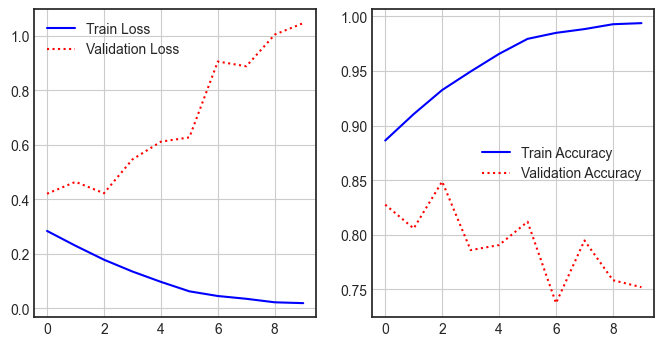

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [25]:
model.evaluate(padded_x_test, y_test)

782/782 [==============================] - 14s 18ms/step - loss: 1.0392 - acc: 0.7516


[1.0392348766326904, 0.7515599727630615]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [26]:
# 위 RNN과 같은 데이터 사용

### 모델 구성

In [30]:
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [31]:
history = model.fit(padded_x_train, y_train, 
                    epochs=10, batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 83s 131ms/step - loss: 0.4538 - acc: 0.7811 - val_loss: 0.3025 - val_acc: 0.8778
Epoch 2/10
625/625 [==============================] - 84s 134ms/step - loss: 0.2801 - acc: 0.8904 - val_loss: 0.3146 - val_acc: 0.8636
Epoch 3/10
625/625 [==============================] - 84s 134ms/step - loss: 0.2397 - acc: 0.9104 - val_loss: 0.2871 - val_acc: 0.8834
Epoch 4/10
625/625 [==============================] - 84s 134ms/step - loss: 0.2047 - acc: 0.9258 - val_loss: 0.2939 - val_acc: 0.8784
Epoch 5/10
625/625 [==============================] - 82s 132ms/step - loss: 0.1846 - acc: 0.9333 - val_loss: 0.2877 - val_acc: 0.8808
Epoch 6/10
625/625 [==============================] - 82s 132ms/step - loss: 0.1678 - acc: 0.9416 - val_loss: 0.3004 - val_acc: 0.8894
Epoch 7/10
625/625 [==============================] - 82s 132ms/step - loss: 0.1521 - acc: 0.9481 - val_loss: 0.3486 - val_acc: 0.8772
Epoch 8/10
625/625 [==============================] - 8

### 시각화

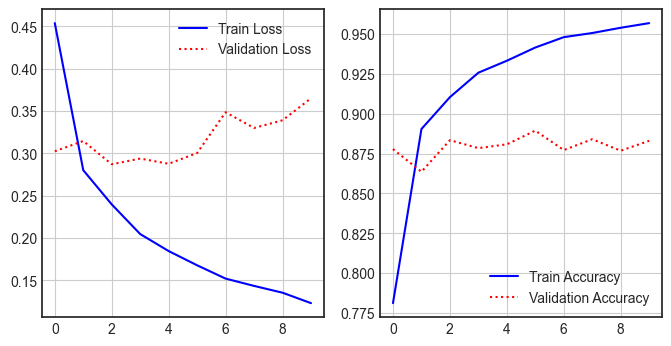

In [32]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

### 모델 평가

In [33]:
model.evaluate(padded_x_test, y_test)

782/782 [==============================] - 37s 48ms/step - loss: 0.4107 - acc: 0.8670


[0.4106576144695282, 0.8669599890708923]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

$\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


### 데이터셋 로드

In [34]:
# 위 RNN, LSTM과 같은 데이터 사용

## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋
  - 다중 분류 문제


### 다른 데이터 사용

In [46]:
from tensorflow.keras.datasets import reuters

num_words = 10000   
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)


print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

max_len = 300
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

print(padded_x_train.shape, padded_x_test.shape)

(8982,) (8982,) (2246,) (2246,)
(8982, 300) (2246, 300)


### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [49]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 256)         2560000   
                                                                 
 gru_10 (GRU)                (None, None, 256)         394752    
                                                                 
 gru_11 (GRU)                (None, 128)               148224    
                                                                 
 dense_7 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3108910 (11.86 MB)
Trainable params: 3108910 (11.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
history = model.fit(padded_x_train, y_train, 
                    epochs=3, batch_size=32,
                    validation_split=0.1)

Epoch 1/10
 14/253 [>.............................] - ETA: 5:12 - loss: 3.2105 - acc: 0.2991

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [ ]:
model.evaluate(padded_x_test, y_test)